In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
#import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='bright')
from sklearn.externals.six import StringIO
#import pydotplus
import sys
print(sys.executable)
pd.options.display.max_rows = 999
pd.options.mode.chained_assignment = None

/Users/adik/anaconda3/bin/python


Load the train and test dataset. We will use train variable to learn the model 

In [14]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_Survived = df_train['Survived']
print ("The shape of the Train set",df_train.shape )
print ("The shape of the Test set",df_test.shape )
print(df_train.columns)
surv = df_train[df_train['Survived'] == 1]
nosurv = df_train[df_train['Survived'] == 0]

The shape of the Train set (891, 12)
The shape of the Test set (418, 11)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


(342, 12)

/Users/adik/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


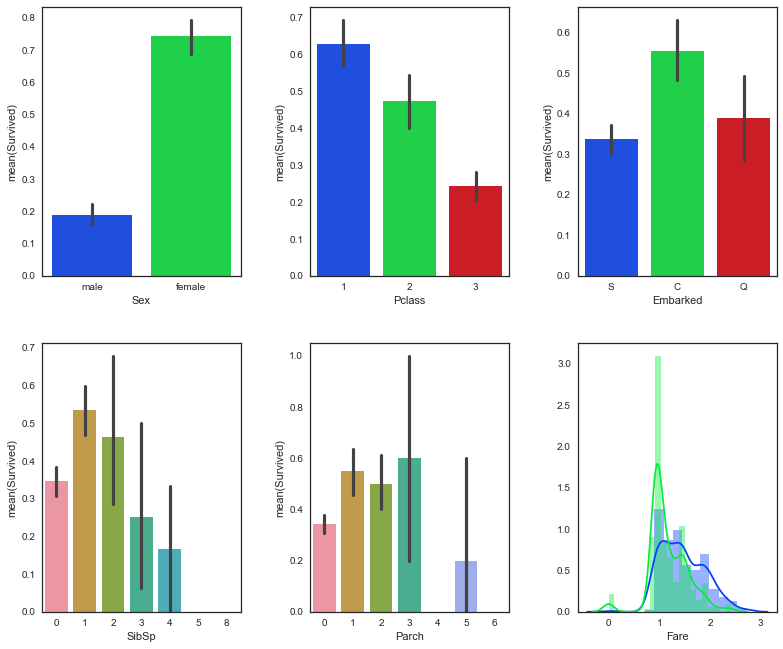

In [28]:
plt.figure(figsize=(12,10))
plt.subplot(231)
sns.barplot('Sex','Survived',data=df_train)
plt.subplot(232)
sns.barplot('Pclass','Survived',data=df_train)
plt.subplot(233)
sns.barplot('Embarked','Survived',data=df_train)
plt.subplot(234)
sns.barplot('SibSp','Survived',data=df_train)
plt.subplot(235)
sns.barplot('Parch','Survived',data=df_train)
plt.subplot(236)
sns.distplot(np.log10(surv['Fare']+1),hist=True,kde=True)
sns.distplot(np.log10(nosurv['Fare']+1))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

In [29]:
grouped = df_train[['Survived','Name','Ticket']].groupby(["Ticket"])
k = 0
for name,group in grouped:
    if (len(grouped.get_group(name))> 3):
        print(grouped.get_group(name))
    k += 1
    if k> 100:
        break


     Survived                                       Name  Ticket
390         1                 Carter, Mr. William Ernest  113760
435         1                  Carter, Miss. Lucile Polk  113760
763         1  Carter, Mrs. William Ernest (Lucile Polk)  113760
802         1        Carter, Master. William Thornton II  113760
     Survived                                             Name  Ticket
297         0                     Allison, Miss. Helen Loraine  113781
305         1                   Allison, Master. Hudson Trevor  113781
498         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  113781
708         1                             Cleaver, Miss. Alice  113781
     Survived             Name Ticket
74          1    Bing, Mr. Lee   1601
169         0    Ling, Mr. Lee   1601
509         1   Lang, Mr. Fang   1601
643         1  Foo, Mr. Choong   1601
692         1     Lam, Mr. Ali   1601
826         0     Lam, Mr. Len   1601
838         1  Chip, Mr. Chang   1601
     Survived   

In [30]:
df_embarked = df_train['Embarked'].value_counts().reset_index()
df_embarked.columns = ['Embarked','Count']
df_embarked_1= df_train['Embarked'].loc[df_train['Survived'] == 1].value_counts().reset_index()
df_embarked['Survived_count'] = df_embarked_1['Embarked']
df_embarked['Survived_ratio'] = df_embarked['Survived_count']/df_embarked['Count']
df_embarked

,Embarked,Count,Survived_count,Survived_ratio
0,S,644,217,0.336957
1,C,168,93,0.553571
2,Q,77,30,0.389610


In [31]:
df_train_dummies = pd.get_dummies(columns=['Embarked','Sex','Pclass'],data=df_train)
df_train_dummies.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1


In [32]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

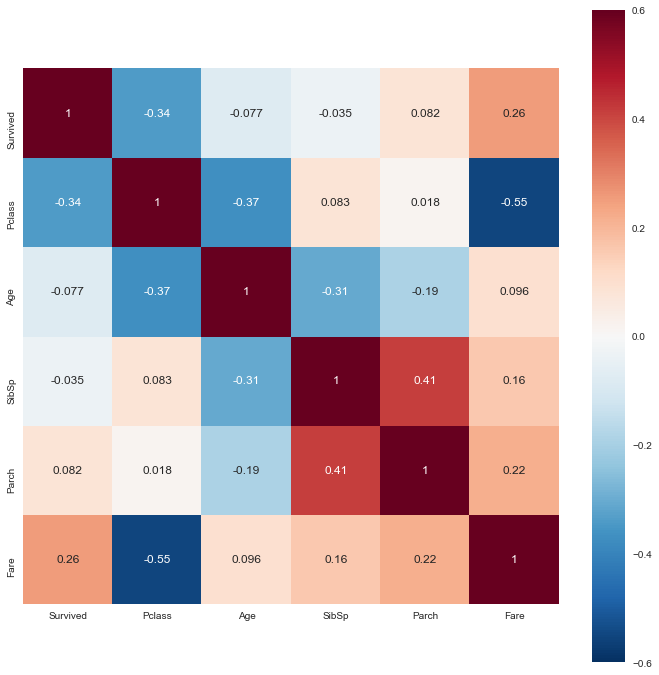

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df_train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].corr(),vmax=0.6,square=True,annot=True)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


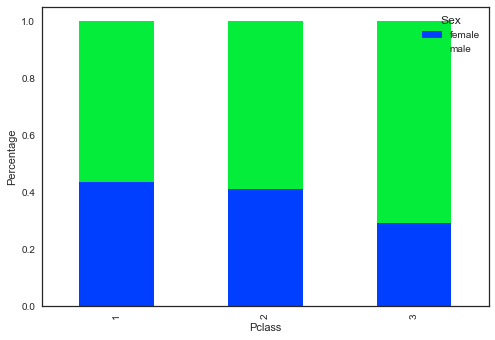

In [66]:
plt.figure(figsize=(12,12))
tab = pd.crosstab(index = df_train['Pclass'], columns = df_train['Sex'])
print(tab)
dummy = tab.div(other = tab.sum(1).astype(float),axis=0).plot(kind = 'bar',stacked=True)
dummy = plt.xlabel('Pclass')
dummy = plt.ylabel('Percentage')

Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


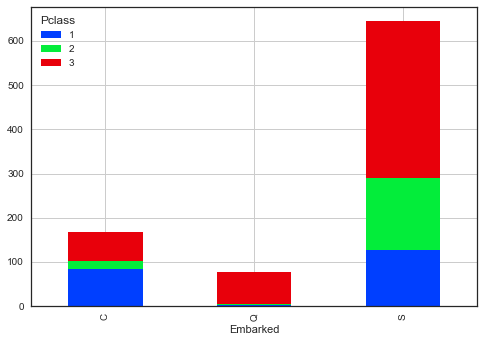

In [75]:
plt.figure(figsize=(12,12))
tab = pd.crosstab(index=df_train['Embarked'],columns=df_train['Pclass'])
print(tab)
tab.plot(kind='bar',stacked= True,grid=True)

We need to understand the type of attributes it has.

In [ ]:
def attributes(df_data):
    df_attributes = df_data.dtypes.reset_index()
    df_attributes.columns = ['Column_name','Column_type']
    return df_attributes
print("Datails of the Train set Column")
data = attributes(df_train)
print(data)
print(" ")
print("Datails of the Test set Column")
data = attributes(df_test)
print(data)

Calculate the missing count for each column and the missing ratio

In [ ]:
def missing_values(df_data):
    df_missing = df_data.isnull().sum().reset_index()
    df_missing.columns = ['Column_name','missing_count']
    df_missing['missing_ratio'] = df_missing.missing_count/df_data.shape[0]
    return df_missing.loc[df_missing.missing_ratio > 0.1]

print ("Missing values from the Train set")
data = missing_values(df_train)
print(data)
print(" ")
data = missing_values(df_test)
print ("Missing values from the Test set")
print(data)

We will tackle the Age column 

In [ ]:
df_train.Age.describe().reset_index()

As we will update the missing values in the Age attribute, we need to look into the Name attribute as we cannot update directly with mean value. So we will update the missing value according to the title used for the Name in the Name attribute

In [ ]:
def updating_missing_values (df_data):
    name_title = ['Mrs.','Miss.','Mr.','Dr.','Rev.','Major.','Capt.','Col.','Master.','Don.','Ms.','Mme.','Mlle.','Lady.','Countess.','Sir.','Jonkheer.']
    for title in name_title:
        df_update = df_data.loc[df_train.Name.str.contains(title,regex=False)]
        df_update.Age.fillna(inplace=True,value=np.around(df_update.Age.mean()))
        print("Mean value for the title",title, "is",np.around(df_update.Age.mean()))
        df_data.update(df_update,join='left',overwrite=True)

    df_missing = df_data.isnull().sum().reset_index()
    df_missing.columns = ['Column_name','missing_count']
    df_missing['missing_ratio'] = df_missing.missing_count/df_data.shape[0]
    return df_missing.loc[df_missing.missing_ratio > 0.1],df_data
    
missing_data , df_train = updating_missing_values(df_train)
print(" ")
missing_data , df_test = updating_missing_values(df_test)

In [ ]:
df_train.drop(inplace=True,labels=['Cabin','Ticket','Embarked'],axis=1)
df_test.drop(inplace=True,labels=['Cabin','Ticket','Embarked'],axis=1)

In [ ]:
df_pclass = df_train.Pclass.value_counts().reset_index()
df_pclass.columns = ['Pclass','Pclass_count']
df_pclass.sort_values(by='Pclass',inplace=True)
df_pclass
df_survived_plcass  = df_train.Pclass[df_train.Survived == 1.0].value_counts().reset_index()
df_survived_plcass.columns = ['Pclass','Pclass_survived_count']
df_survived_plcass.sort_values(by='Pclass',inplace=True)
df_survived_plcass['survived_ratio'] = df_survived_plcass['Pclass_survived_count']/df_pclass['Pclass_count']
df_survived_plcass['Pclass_count'] = df_pclass['Pclass_count']
df_survived_plcass

In [ ]:
df_train['Family_size'] = df_train['SibSp'] + df_train['Parch']
df_family_size = df_train.Family_size.value_counts().reset_index()
df_family_size.columns = ['Family_size','Family_size_count']
df_family_size.sort_values(by='Family_size',inplace=True)
df_family_size
df_survived_family_size  = df_train.Family_size[df_train.Survived == 1.0].value_counts().reset_index()
df_survived_family_size.columns = ['Family_size','Family_size_survived_count']
df_survived_family_size.sort_values(by='Family_size',inplace=True)
df_survived_family_size['survived_ratio'] = df_survived_family_size['Family_size_survived_count']/df_family_size['Family_size_count']
df_survived_family_size['Family_size_count'] = df_family_size['Family_size_count']
df_survived_family_size

In [ ]:
df_test['Family_size'] = df_test['SibSp'] + df_test['Parch']
df_family_size = df_test.Family_size.value_counts().reset_index()
df_family_size.columns = ['Family_size','Family_size_count']
df_family_size.sort_values(by='Family_size',inplace=True)
df_family_size
df_survived_family_size  = df_test.Family_size[df_train.Survived == 1.0].value_counts().reset_index()
df_survived_family_size.columns = ['Family_size','Family_size_survived_count']
df_survived_family_size.sort_values(by='Family_size',inplace=True)
df_survived_family_size['survived_ratio'] = df_survived_family_size['Family_size_survived_count']/df_family_size['Family_size_count']
df_survived_family_size['Family_size_count'] = df_family_size['Family_size_count']
df_survived_family_size

In [ ]:
#df_train.drop(inplace=True,labels=['SibSp','Parch'],axis=1)
df_test.drop(inplace=True,labels=['SibSp','Parch'],axis=1)

In [ ]:
x_fit = svm.LinearSVC()
df_train.columns

In [ ]:
x_fit.fit(df_train[['Age','Pclass','Family_size']],y=df_Survived)

In [ ]:
x_fit.predict(df_test[['Age','Pclass','Family_size']])

In [ ]:
clf = svm.SVC(kernel='linear',C =0.1)
clf.fit(df_train[['Age','Pclass','Family_size']],df_Survived)
test_value_predict = clf.predict(df_test[['Age','Pclass','Family_size']])
test_value = pd.DataFrame(test_value_predict)
#print(metrics.log_loss(y_true=df_Survived,y_pred=df_train[['Age','Pclass','Family_size']]))
test_value.columns = ['Survived']
test_value.insert(0,'PassengerId',pd.Series(np.arange(892,1310,1),index= test_value.index))
test_value.to_csv(path_or_buf='values.csv',index=False)

In [ ]:
print("Hello")